In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the Excel files into separate dataframes
dfTomato = pd.read_excel('data/Tomatoes.xls')
dfApple = pd.read_excel('data/apples.xls')
dfEgg = pd.read_excel('data/eggs.xls')
dfMaize = pd.read_excel('data/maize.xls')

In [4]:
dfTomato.head()

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date
0,Tomatoes,-,-,-,Ngurubani Market,50.00/Kg,60.00/Kg,2000.0,Kirinyaga,2023-03-03
1,Tomatoes,-,-,-,Keroka,60.00/Kg,75.76/Kg,11550.0,Nyamira,2023-03-03
2,Tomatoes,-,-,-,Keroka,60.00/Kg,75.76/Kg,11550.0,Nyamira,2023-03-03
3,Tomatoes,-,-,-,Gikomba,-,80.00/Kg,NaN,Nairobi,2023-03-03
4,Tomatoes,-,-,-,Bungoma town,125.00/Kg,150.00/Kg,8000.0,Bungoma,2023-03-03


In [5]:
# Concatenate the dataframes vertically
all_df = pd.concat([dfTomato, dfApple, dfEgg, dfMaize], axis=0)

# Reset the index of the concatenated dataframe
all_df = all_df.reset_index(drop=True)
all_df.head()

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date
0,Tomatoes,-,-,-,Ngurubani Market,50.00/Kg,60.00/Kg,2000.0,Kirinyaga,2023-03-03
1,Tomatoes,-,-,-,Keroka,60.00/Kg,75.76/Kg,11550.0,Nyamira,2023-03-03
2,Tomatoes,-,-,-,Keroka,60.00/Kg,75.76/Kg,11550.0,Nyamira,2023-03-03
3,Tomatoes,-,-,-,Gikomba,-,80.00/Kg,NaN,Nairobi,2023-03-03
4,Tomatoes,-,-,-,Bungoma town,125.00/Kg,150.00/Kg,8000.0,Bungoma,2023-03-03


In [6]:
# check for nulls in each column
null_cols = all_df.isnull().any(axis=0)

In [7]:
print(null_cols[null_cols == True])

Supply Volume    True
dtype: bool


In [8]:
all_df = all_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# replace blank values with NaN
all_df.replace('', np.nan, inplace=True)
all_df.head()

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date
0,Tomatoes,-,-,-,Ngurubani Market,50.00/Kg,60.00/Kg,2000.0,Kirinyaga,2023-03-03
1,Tomatoes,-,-,-,Keroka,60.00/Kg,75.76/Kg,11550.0,Nyamira,2023-03-03
2,Tomatoes,-,-,-,Keroka,60.00/Kg,75.76/Kg,11550.0,Nyamira,2023-03-03
3,Tomatoes,-,-,-,Gikomba,-,80.00/Kg,NaN,Nairobi,2023-03-03
4,Tomatoes,-,-,-,Bungoma town,125.00/Kg,150.00/Kg,8000.0,Bungoma,2023-03-03


In [9]:
# drop the columns with null values
all_df.drop('Grade', axis=1, inplace=True)
all_df.drop('Sex', axis=1, inplace=True)
all_df


,Commodity,Classification,Market,Wholesale,Retail,Supply Volume,County,Date
0,Tomatoes,-,Ngurubani Market,50.00/Kg,60.00/Kg,2000.0,Kirinyaga,2023-03-03
1,Tomatoes,-,Keroka,60.00/Kg,75.76/Kg,11550.0,Nyamira,2023-03-03
2,Tomatoes,-,Keroka,60.00/Kg,75.76/Kg,11550.0,Nyamira,2023-03-03
3,Tomatoes,-,Gikomba,-,80.00/Kg,NaN,Nairobi,2023-03-03
4,Tomatoes,-,Bungoma town,125.00/Kg,150.00/Kg,8000.0,Bungoma,2023-03-03
...,...,...,...,...,...,...,...,...
245,Dry Maize,Mixed-Traditional,Kiritiri,60.00/Kg,70.00/Kg,7400.0,Embu,2023-02-13
246,Dry Maize,White Maize,Kutus,61.11/Kg,73.98/Kg,0.0,Kirinyaga,2023-02-13
247,Dry Maize,Mixed-Traditional,Isebania Market,-,53.33/Kg,2400.0,Migori,2023-02-13
248,Dry Maize,Mixed-Traditional,Nakuru Top Market,-,75.00/Kg,NaN,Nakuru,2023-02-13


In [10]:
all_df['Date'] = pd.to_datetime(all_df['Date'])

In [11]:
# group the data by commodity and county and sum the supply volume
df_grouped = all_df.groupby(['Commodity', 'County'])['Supply Volume'].sum().reset_index()

In [12]:
# pivot the data to create a table with commodities as rows, counties as columns, and supply volume as values
df_pivot = df_grouped.pivot(index='Commodity', columns='County', values='Supply Volume')


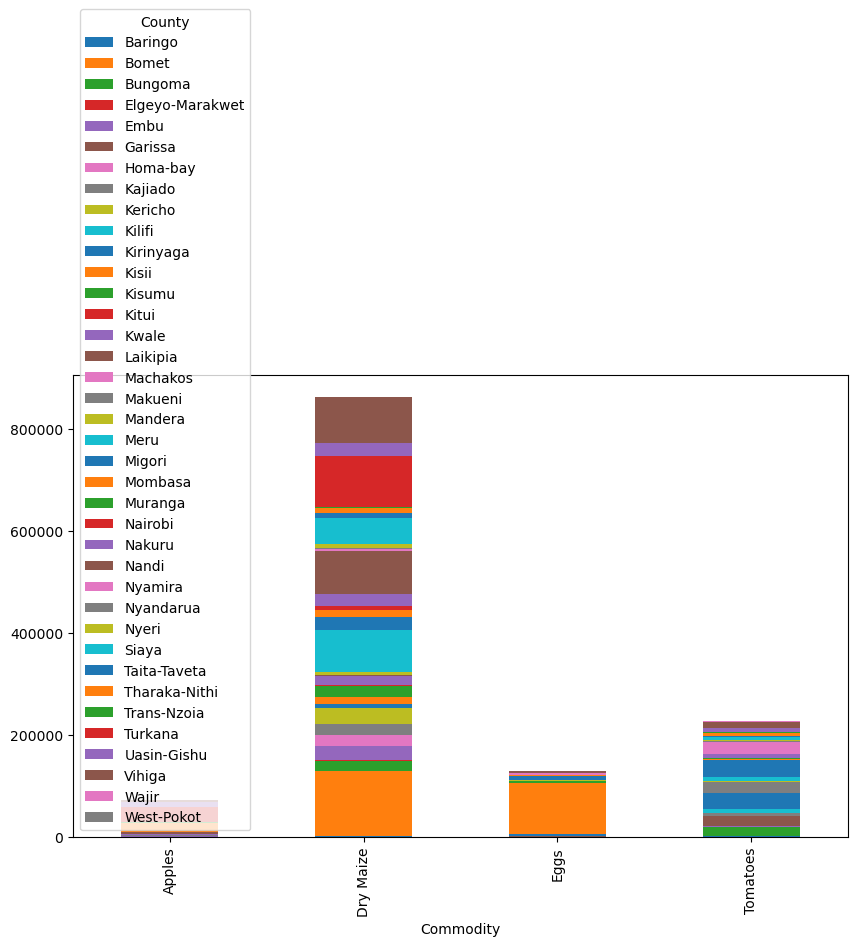

In [13]:
# create the stacked bar chart
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

In [16]:
top_counties = df_grouped.groupby('Commodity').apply(lambda x: x.nlargest(3, 'Supply Volume'))

<AxesSubplot:xlabel='Commodity'>

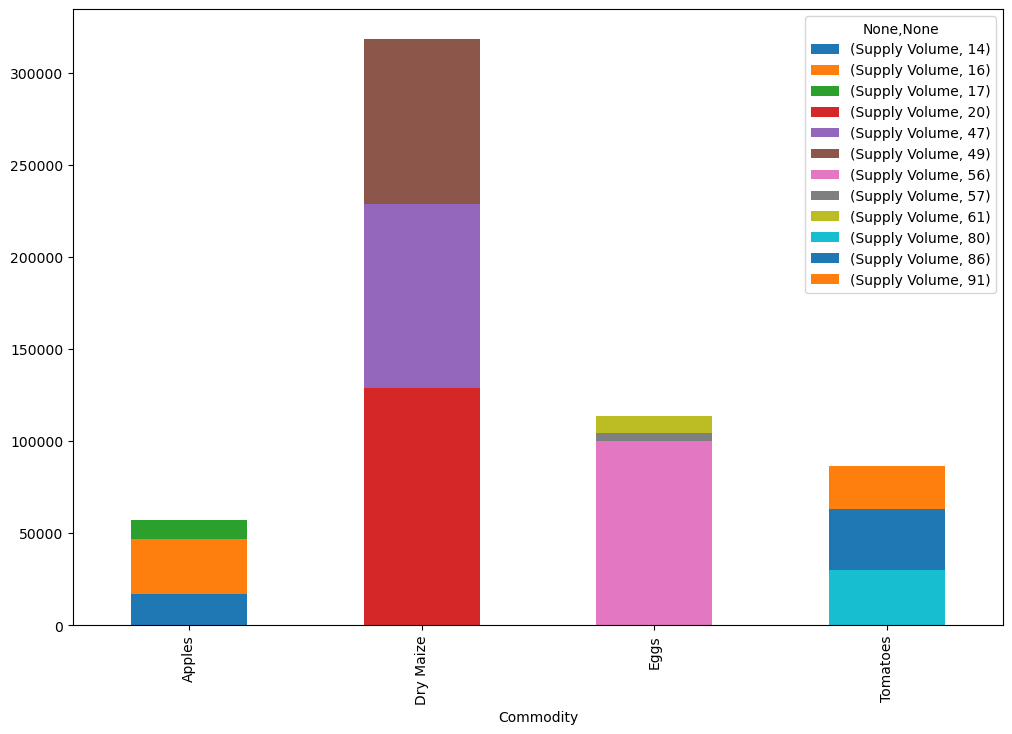

In [ ]:
# create a stacked bar chart
fig, ax = plt.subplots(figsize=(12,8))
top_counties.unstack().plot(kind='bar', stacked=True, ax=ax)


Text(0.5, 1.0, 'Total Supply Volume by Commodity and County (Top 3 Counties)')

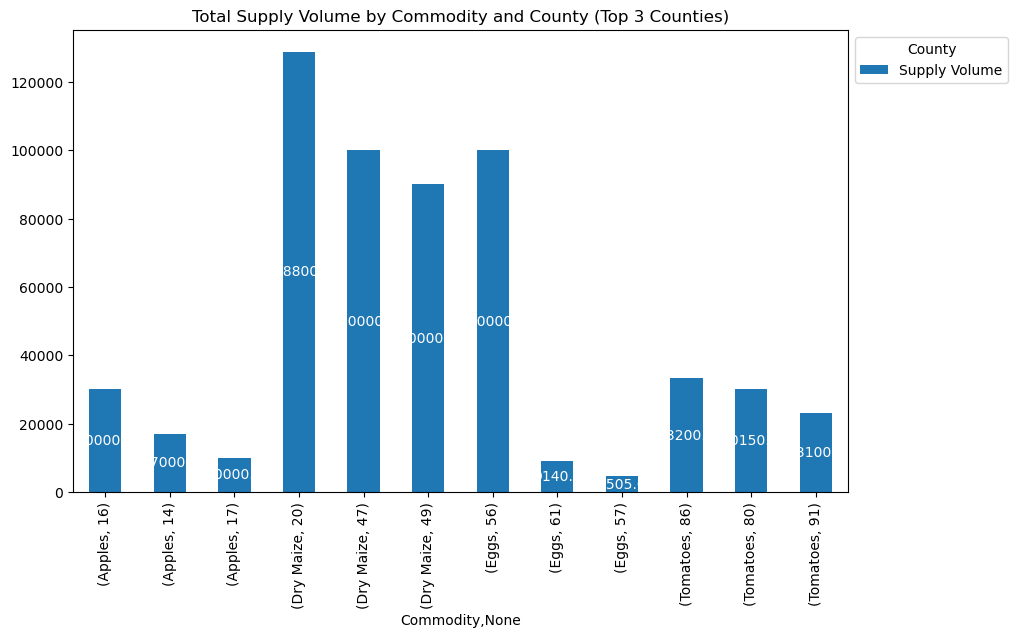

In [18]:
fig, ax = plt.subplots(figsize=(10,6))

# plot the stacked bar chart
top_counties.plot(kind='bar', stacked=True, ax=ax)

# iterate over each rectangle in the plot and add text label for each county
for i in ax.containers:
    for j in i:
        if j.get_height() > 0:
            ax.text(j.get_x() + j.get_width() / 2, j.get_y() + j.get_height() / 2,
                    str(j.get_height()), ha='center', va='center', fontsize=10, color='white')

# add legend and title
ax.legend(title='County', bbox_to_anchor=(1,1), loc='upper left')
ax.set_title('Total Supply Volume by Commodity and County (Top 3 Counties)')

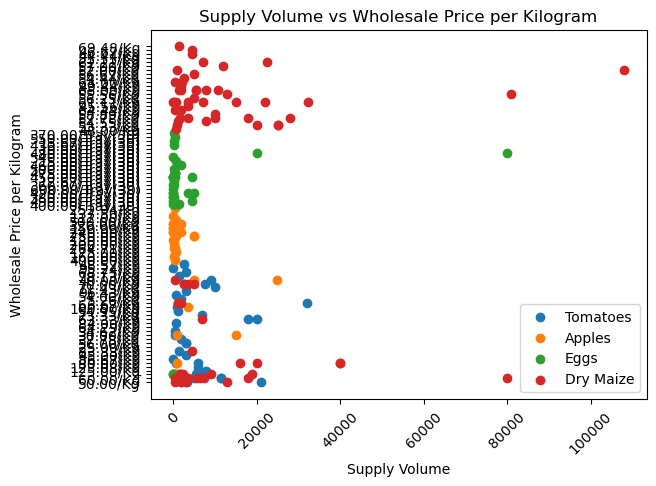

In [22]:
# create a scatter plot for each commodity
plt.xticks(rotation=45)
for commodity in all_df['Commodity'].unique():
    # subset the dataframe for the current commodity
    df_subset = all_df[all_df['Commodity'] == commodity]
    
    # create the scatter plot
    plt.scatter(df_subset['Supply Volume'], df_subset['Wholesale'], label=commodity)

# set the plot title and axis labels
plt.title('Supply Volume vs Wholesale Price per Kilogram')
plt.xlabel('Supply Volume')
plt.ylabel('Wholesale Price per Kilogram')

# add a legend to the plot
plt.legend()

# show the plot
plt.show()